Cold Email Generator

USED TOOLS
  - Llama 3.1 : free open source LLM by meta(facebook)
  - Chroma db vector store
  - LangChain
  - Streamlit

This project is about creating a "cold email generator app" using LLMs (large language models), the **purpose or end goal** of the project is:

- **To enable automation of cold email creation** for business-to-business (B2B) or client communications.
- Companies like TCS, Infosys, and Atliq Technologies may use this to **serve their clients** (e.g., Nike, J.P. Morgan, Kroger) by generating personalized and effective emails.
- The project demonstrates **how AI can streamline outreach** processes, saving time and increasing efficiency in connecting with clients.

The broader objective could involve:
1. Training students to integrate LLMs into practical use cases.
2. Showcasing how AI-driven tools improve business communication and client engagement.


![codebasics - Gen AI Project Using Llama3.1 End to End Gen AI Project [CO4E_9V6li0 - 767x431 - 1m07s].png](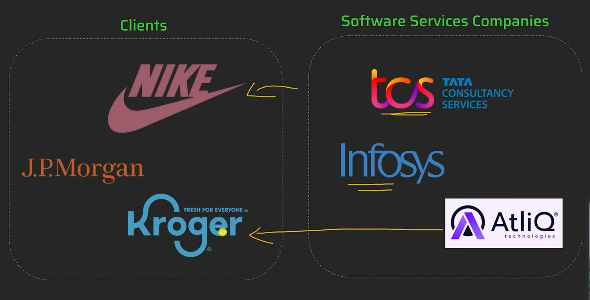)

Let's say TCS is at Nike Job Portal, and finds that Nike requires a software engineer with certain skill sets and study background and all.

TCS will look into all the skills etc they require, then what TCS will do with this application is : TCS will send a cold email like this "Hi, looks like you require a softwarre engineer. We have these peoples. ............. Instead of hiring for full time, you can hire people from us for part time.........". So TCS will sent this kind of cold email to Nike and many times this kind of cold email techniques work.

Also clienks like Nike don't always want to hire for full time, they hire for part time as well/ on contract basis.

Now a sales representative or BDA(business development executive) will have to form a nice email which is relevant to the job role. So he can use AI or this our app which just need the job post link. Our app is capable enough to go to the job post website and analyse the job and write an email which is relevant.

Chromadb : database in which TCS(we) have previously stored the skill sets for the TCS company employees. We are here working as TCS salesmanager

![codebasics - Gen AI Project Using Llama3.1 End to End Gen AI Project [CO4E_9V6li0 - 767x431 - 4m29s].png](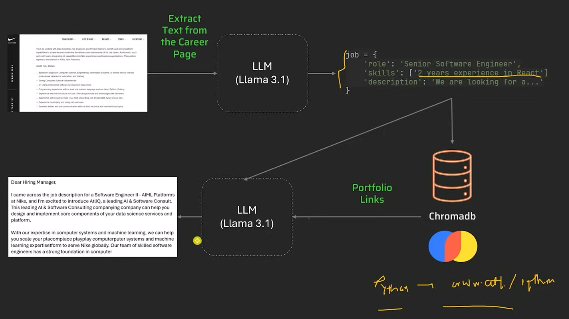)

Technical Architechture : We will go for career page of Nike, Extract text from that page using LangChain framework, then we will use LLM i.e. Llama 3.1 to extract job role, skill requirement, description in a json i.e. dictionary formate. Then we will pass this to chromadb i.e. vector db. In this chromadb TCS has previously stored the skills of the employees. So using the extracted `Job` dictionary and the portfolio link of the employees from the chromadb, in LLM(llama 3.1) , llama will generate a nice email that will be sent to nike.

* We are not going to use locally downloaded llama, response/inference is very slow
* We will use groq. Groq is a plateform which allow us to run llama 3.1 in cloud and the inference is very very fast, because they use something call LPU, Language Processing Unit, which makes inference very very fast, which means when yu ask inference, the response will come very very fast.

ChatGrop is a class which LangChain framework offers

# Basic implementation and use of choradb and llama3.1 70b model, with the help of API on Groq server

In [1]:
!pip install langchain

In [2]:
!pip install langchain-groq

In [3]:
# importing ChatGroq class
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = "llama-3.1-70b-versatile",
    temperature = 0, # 0 means no randomness/ no creativity, each times same responce for same question
    groq_api_key = "gsk_*************************************"
)


In [4]:
llm.invoke("I want to open a restraunt in India. Suggest some fancy names for it")

AIMessage(content='Here are some fancy name suggestions for your restaurant in India:\n\n1. **Tandoor Taj**: This name combines the idea of traditional Indian tandoor cooking with the grandeur of the Taj Mahal.\n2. **Dhaba Royale**: "Dhaba" is a colloquial term for a small, rustic eatery, but adding "Royale" gives it a luxurious twist.\n3. **Spice Route**: This name evokes the idea of exotic spices and the ancient trade routes that connected India to the rest of the world.\n4. **Maharaja\'s Kitchen**: This name conjures up images of royal cuisine and the rich culinary traditions of India\'s maharajas.\n5. **Bollywood Bites**: This name combines the glamour of Bollywood with the idea of bite-sized, flavorful food.\n6. **The Spice Palace**: This name suggests a regal, opulent atmosphere and a focus on aromatic spices.\n7. **Taste of India**: This name is simple yet effective, conveying the idea of a culinary journey through India\'s diverse regions.\n8. **The Gourmet Garage**: This name 

In [5]:
response = llm.invoke("I want to open a restraunt in India. Suggest some fancy names for it")
print(response.content)

Here are some fancy name suggestions for your restaurant in India:

1. **Tandoor Nights**: Inspired by the traditional Indian tandoor oven, this name evokes a sense of warmth and exotic flavors.
2. **Dhaba Royale**: A dhaba is a traditional Indian roadside eatery, and adding "Royale" gives it a luxurious twist.
3. **Spice Route**: This name references the ancient spice trade routes that connected India to the world, hinting at the rich flavors and aromas within.
4. **Maharaja's Kitchen**: This name conjures up images of royal feasts and opulent cuisine, perfect for a high-end restaurant.
5. **Taste of Taj**: Inspired by the iconic Taj Mahal, this name suggests a culinary experience that's both regal and unforgettable.
6. **Bollywood Bites**: This name captures the vibrant energy of India's film industry and promises a flavorful, entertaining dining experience.
7. **The Spice Palace**: This name combines the warmth of Indian spices with the grandeur of a palace, hinting at a luxurious d

In [6]:
!pip install chromadb

In [7]:
# creating a collection where I can insert my records
import chromadb

client = chromadb.Client()
collection = client.create_collection(name="my_colllection")

In [8]:
# to add document : i.e. data records
# why we are not using traditional database like mysql, we are using this vector database
# Vector database is able to do semantic search. Means search based on context, keval vector database kr skta hai
# traditional databases like mysql can not to seach based on context,

collection.add(
    documents = [
        "This document is about New York",
        "This document is about Delhi"
    ],
    ids = ['id1','id2']
)

In [9]:
all_docs = collection.get()
all_docs

{'ids': ['id1', 'id2'],
 'embeddings': None,
 'documents': ['This document is about New York',
  'This document is about Delhi'],
 'uris': None,
 'data': None,
 'metadatas': [None, None],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [11]:
# get individual document by id
document = collection.get(ids=["id1"])
document

{'ids': ['id1'],
 'embeddings': None,
 'documents': ['This document is about New York'],
 'uris': None,
 'data': None,
 'metadatas': [None],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [14]:
result = collection.query(
    query_texts = ['Query is about Chole Bhature'],
    n_results = 2
)
result

{'ids': [['id2', 'id1']],
 'embeddings': None,
 'documents': [['This document is about Delhi',
   'This document is about New York']],
 'uris': None,
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[1.443028450012207, 1.8624567985534668]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

Means id2 i.e. delhi is 1.44 semantic distance away, and id1 i.e. new york is 1.86 semantic distance away.

So we can say that result is more close to delhi. Hence chole bhature matched to delhi(id2)

In [15]:
result = collection.query(
    query_texts = ['Query is about Pizza'],
    n_results = 2
)
result

{'ids': [['id1', 'id2']],
 'embeddings': None,
 'documents': [['This document is about New York',
   'This document is about Delhi']],
 'uris': None,
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[1.6637976169586182, 1.7067852020263672]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

Pizza to lgbhag same aa gya dono me, but new york comes first, its semantic distance is less

In [16]:
result = collection.query(
    query_texts = ['Query is Brooklyn Bridge'],
    n_results = 2
)
result

{'ids': [['id1', 'id2']],
 'embeddings': None,
 'documents': [['This document is about New York',
   'This document is about Delhi']],
 'uris': None,
 'data': None,
 'metadatas': [[None, None]],
 'distances': [[1.2424530982971191, 1.7273494005203247]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

'This document is about New York' comes first, that's correct

So we can see it is doing a meaning based semantic search. As a human, if I ask someone, they will reply the same. So kind of logical thinking we can say the model has, that has been possible beacuse of this vector representation of the data and storage in vector databases like chromadb

In [17]:
# to delete all the documents

collection.delete(ids = all_docs['ids'])
collection.get()

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [18]:
# so everything got deleted

In [19]:
# adding additional data in the database

collection.add(

    documents = [
        "This document is about New York",
        "This document is about Delhi"
    ],

    ids = ['id3', 'id4'],

    metadatas = [
        {"url" : "https://en.wikipedia.org/wiki/New_York_City"},
        {"url" : "https://en.wikipedia.org/wiki/Delhi"}
    ]

)

In [20]:
collection.query(
    query_texts = ["Query is about Pollution"],
    n_results = 2
)

{'ids': [['id4', 'id3']],
 'embeddings': None,
 'documents': [['This document is about Delhi',
   'This document is about New York']],
 'uris': None,
 'data': None,
 'metadatas': [[{'url': 'https://en.wikipedia.org/wiki/Delhi'},
   {'url': 'https://en.wikipedia.org/wiki/New_York_City'}]],
 'distances': [[1.4982374906539917, 1.6413264274597168]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

Definately delhi comes first, as delhi has more pollution.

Having this metadat will be useful in some cases

# Code for email generator

In [22]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.19
    Uninstalling langchain-core-0.3.19:
      Successfully uninstalled langchain-core-0.3.19
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.7
    Uninstalling langchain-0.3.7:
      Successfully uninstalled langchain-0.3.7


In [23]:
from langchain_community.document_loaders import WebBaseLoader

In [63]:
# webscrapping

loader = WebBaseLoader("https://jobs.nike.com/job/R-40984?from=job%20search%20funnel")
page_data = loader.load().pop().page_content

# it will go to the website. The data will be in HTML format internally
# It will went through the HTML and extract all these key information

In [64]:
page_data

"Apply for Director - AI/ML Engineering\n\nSearch JobsSkip navigationSearch JobsNIKE, INC. JOBSContract JobsJoin The Talent CommunityLife @ NikeOverviewBenefitsBrandsOverviewJordanConverseTeamsOverviewAdministrative SupportAdvanced InnovationAir Manufacturing InnovationAviationCommunicationsCustomer ServiceDesignDigitalFacilitiesFinance & AccountingGovernment & Public AffairsHuman ResourcesInsights & AnalyticsLegalManufacturing & EngineeringMarketingMerchandisingPlanningPrivacyProcurementProduct Creation, Development & ManagementRetail CorporateRetail StoresSalesSocial & Community ImpactSports MarketingStrategic PlanningSupply Chain, Distribution & LogisticsSustainabilityTechnologyLocationsOverviewNike WHQNike New York HQEHQ: Hilversum, The NetherlandsELC: Laakdal, BelgiumGreater China HQDiversity, Equity & InclusionOverviewMilitary InclusionDisability InclusionIndigenous InclusionInternshipsData & AnalyticsDirector - AI/ML EngineeringBeaverton, OregonBecome a Part of the NIKE, Inc. Te

In [65]:
## Giving it a job posting, like we gave above
## and extract skill, role and description in form of a json object i.e. nothing but a dictionary

from langchain_core.prompts import PromptTemplate

prompt_extract = PromptTemplate.from_template(
    """
    ### SCRAPD TEXT FROM WEBSITE
    {page_data}
    ### INSTRUCTION
    The scraped text is from the career's page of a website
    The job is to extract the job posting and return them in JSON format containing the
    following keys : 'role', 'experience', 'skills' and 'description'.
    Only return the valid JSON
    ### VALID JSON ( NO PREAMBLE ):
    """
)

chain_extract = prompt_extract | llm
res = chain_extract.invoke(input = {'page_data' : page_data}) # upar jo define kiya tha variable
print(res.content)

```json
{
  "role": "Director - AI/ML Engineering",
  "experience": "10+ years of experience across multiple roles in developing productionized code in software or data engineering, machine learning or a related field (experience delivering analytics and ML products preferred). 4+ years in a leadership or management role using Agile frameworks, processes, and team structures.",
  "skills": [
    "Deep knowledge and experience in delivering production grade software at scale",
    "Familiarity with ETL, ML, or analytics technologies such as Scikit-learn, Dask, Tensorflow, Kubeflow, Spark, EMR, or similar platforms and frameworks",
    "Fluency in the application of open-source technologies and the impact of standardized platforms",
    "Ability to make build/buy decisions in the area of Data Science, AI, & ML",
    "Strong skills in team leadership and building positive relationships across Product, Architecture, and Engineering"
  ],
  "description": "Nike is looking for a seasoned Eng

See the power of 70 B parametered LLM, extracted correctly the data, without any preamble

In [66]:
type(res.content)

str

In [67]:
# although the generated this is json, but its dtye is string. Let's convert it into JSON object

from langchain_core.output_parsers import JsonOutputParser

json_parser = JsonOutputParser()
json_res = json_parser.parse(res.content)
json_res

{'role': 'Director - AI/ML Engineering',
 'experience': '10+ years of experience across multiple roles in developing productionized code in software or data engineering, machine learning or a related field (experience delivering analytics and ML products preferred). 4+ years in a leadership or management role using Agile frameworks, processes, and team structures.',
 'skills': ['Deep knowledge and experience in delivering production grade software at scale',
  'Familiarity with ETL, ML, or analytics technologies such as Scikit-learn, Dask, Tensorflow, Kubeflow, Spark, EMR, or similar platforms and frameworks',
  'Fluency in the application of open-source technologies and the impact of standardized platforms',
  'Ability to make build/buy decisions in the area of Data Science, AI, & ML',
  'Strong skills in team leadership and building positive relationships across Product, Architecture, and Engineering'],
 'description': 'Nike is looking for a seasoned Engineering leader who can lead a

In [68]:
type(json_res)

dict

In [69]:
# once this step is over, next step is to prepare chromadb
# There we will have 2 columns : 1st is the techstack/skills used in the project,
# and 2nd will be the Links of the project, just for reference if the company want to see the work done in the project

In [70]:
# the code will extract the skills from the job posting and it will match one or multiple
# of these technologies and generate a mail with the matching techstack and corresponding portfolio links

In [71]:
import pandas as pd

df = pd.read_csv("my_portfolio.csv")

In [72]:
df

,Techstack,Links
0,"React, Node.js, MongoDB",https://example.com/react-portfolio
1,"Angular,.NET, SQL Server",https://example.com/angular-portfolio
2,"Vue.js, Ruby on Rails, PostgreSQL",https://example.com/vue-portfolio
3,"Python, Django, MySQL",https://example.com/python-portfolio
4,"Java, Spring Boot, Oracle",https://example.com/java-portfolio
5,"Flutter, Firebase, GraphQL",https://example.com/flutter-portfolio
6,"WordPress, PHP, MySQL",https://example.com/wordpress-portfolio
7,"Magento, PHP, MySQL",https://example.com/magento-portfolio
8,"React Native, Node.js, MongoDB",https://example.com/react-native-portfolio
9,"iOS, Swift, Core Data",https://example.com/ios-portfolio


In [73]:
# now iterating over dataframe / my compnay(TCS) data, and insert record one by one in the chroma db

* chromadb.Client = it will create chromadb in memory

* chromadb.PersistentClient = it will create a chromadb on disk.

So in your current folder, the database will be created and stored. So that when nexttime, i want to retrieve on my data I have it on my disc.

In [74]:
import chromadb
import uuid

client = chromadb.PersistentClient('vectorstore') # PersistentClient = create a folder and store your records inside that
collection = client.get_or_create_collection(name = "portfolio")

if not collection.count():
  for _ , row in df.iterrows():
    collection.add(documents = row["Techstack"],
                   metadatas = {"links" : row['Links']},
                   ids = [str(uuid.uuid4())]
                   )

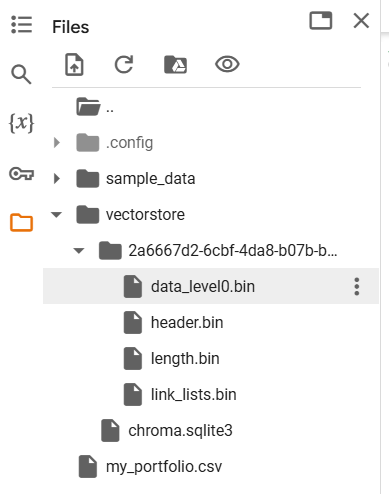

So kuch is prakar se vo sari TCS ki 19 rows are now stored in our vactor database.

In [75]:
collection

Collection(name=portfolio)

In [76]:
print(collection.get())

{'ids': ['240ffaed-e65a-46d5-8dea-744207b3969a', 'ae05a186-4dd0-48c4-b5d2-a8eb3c358bc3', '2510b59e-fec1-42fe-9c05-38ec9463da59', 'a29f2b6a-d56c-482f-9ac4-d4fc8a734b49', '0d8a9a77-95c1-4b1f-bd30-a6bbc195243d', '8a18f010-b716-42dc-954a-2b3543474289', '6c4505b9-ae09-4dff-abb0-bae4579b9d5e', 'ae794eb0-2e80-4eb2-ae19-b44a73b7b2be', '0ff58725-01a9-4c0e-ba2b-522d157c2adb', '5f31870d-98e8-4b66-a48b-5a70706fcfb1', 'e4c78cb6-fd9f-407f-a2ae-6359bc60935b', 'f61efbdb-17da-4a6d-a289-a921bd7617a4', '90dfe8b9-7741-4c10-bc74-336303abcff5', 'a28f1348-a6a1-42e4-a6cb-89c4e1cd830a', '49c5d113-546e-49ba-9b6a-3b963d55968a', '4e9556c8-9a11-4c18-9b08-6be695ff16e8', '99a05b54-3493-40e4-ae84-979712a28012', '9151262f-e242-47d7-a691-766719da9ee3', '1dfc1ea0-e163-4597-b455-5ce36231fee3', '6d2fd255-537b-48cc-b9f3-138bce82c5d8'], 'embeddings': None, 'documents': ['React, Node.js, MongoDB', 'Angular,.NET, SQL Server', 'Vue.js, Ruby on Rails, PostgreSQL', 'Python, Django, MySQL', 'Java, Spring Boot, Oracle', 'Flutter, 

In [77]:
collection.get()

{'ids': ['240ffaed-e65a-46d5-8dea-744207b3969a',
  'ae05a186-4dd0-48c4-b5d2-a8eb3c358bc3',
  '2510b59e-fec1-42fe-9c05-38ec9463da59',
  'a29f2b6a-d56c-482f-9ac4-d4fc8a734b49',
  '0d8a9a77-95c1-4b1f-bd30-a6bbc195243d',
  '8a18f010-b716-42dc-954a-2b3543474289',
  '6c4505b9-ae09-4dff-abb0-bae4579b9d5e',
  'ae794eb0-2e80-4eb2-ae19-b44a73b7b2be',
  '0ff58725-01a9-4c0e-ba2b-522d157c2adb',
  '5f31870d-98e8-4b66-a48b-5a70706fcfb1',
  'e4c78cb6-fd9f-407f-a2ae-6359bc60935b',
  'f61efbdb-17da-4a6d-a289-a921bd7617a4',
  '90dfe8b9-7741-4c10-bc74-336303abcff5',
  'a28f1348-a6a1-42e4-a6cb-89c4e1cd830a',
  '49c5d113-546e-49ba-9b6a-3b963d55968a',
  '4e9556c8-9a11-4c18-9b08-6be695ff16e8',
  '99a05b54-3493-40e4-ae84-979712a28012',
  '9151262f-e242-47d7-a691-766719da9ee3',
  '1dfc1ea0-e163-4597-b455-5ce36231fee3',
  '6d2fd255-537b-48cc-b9f3-138bce82c5d8'],
 'embeddings': None,
 'documents': ['React, Node.js, MongoDB',
  'Angular,.NET, SQL Server',
  'Vue.js, Ruby on Rails, PostgreSQL',
  'Python, Django, M

In [78]:
# simple collection query : i need employees with these these skills

response = collection.query(query_texts=['Experience in Python', 'Expert in React'], n_results=2)
response.get("metadatas")
# for each of the skills I want 2 records and I extracted the metadata only , means i just extracted the metadata links

[[{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/python-portfolio'}],
 [{'links': 'https://example.com/react-portfolio'},
  {'links': 'https://example.com/react-native-portfolio'}]]

In [79]:
# Query the collection for 'Python' and 'React' and get everything (valid fields only)
response = collection.query(
    query_texts=['Profficient in Python', 'Expert in React'],  # Skills to query
    n_results=2,                      # Number of results for each query
    include=['documents', 'metadatas', 'embeddings', 'uris', 'distances']  # Valid components only
)

# Print the full response to see what's included
response # embedding, distances, metadata(i.e. links), sb kuch de diya

{'ids': [['1dfc1ea0-e163-4597-b455-5ce36231fee3',
   'a29f2b6a-d56c-482f-9ac4-d4fc8a734b49'],
  ['240ffaed-e65a-46d5-8dea-744207b3969a',
   '0ff58725-01a9-4c0e-ba2b-522d157c2adb']],
 'embeddings': [array([[-3.72996219e-02, -1.21057659e-01,  2.83873677e-02,
          -4.63879667e-04,  2.36852691e-02, -5.66522926e-02,
          -2.32486818e-02, -5.89406155e-02, -1.19436324e-01,
          -1.06393397e-01, -9.48948786e-02,  7.49186240e-03,
          -3.51548716e-02, -9.75631177e-03, -3.08664255e-02,
           3.93445715e-02, -5.73701672e-02,  3.36542502e-02,
          -2.80290693e-02, -1.28990009e-01, -2.51100082e-02,
           2.51921415e-02, -3.53054516e-02, -4.28827293e-03,
           4.98835109e-02, -1.06078181e-02,  5.04437126e-02,
           3.58926095e-02, -3.32053527e-02, -2.78790090e-02,
           1.81885082e-02, -1.70492865e-02, -2.19828822e-03,
          -8.14811140e-03, -1.06150275e-02,  2.29977630e-03,
          -3.55513431e-02, -4.94076200e-02, -5.01014851e-02,
           

In [80]:
job = json_res
job

{'role': 'Director - AI/ML Engineering',
 'experience': '10+ years of experience across multiple roles in developing productionized code in software or data engineering, machine learning or a related field (experience delivering analytics and ML products preferred). 4+ years in a leadership or management role using Agile frameworks, processes, and team structures.',
 'skills': ['Deep knowledge and experience in delivering production grade software at scale',
  'Familiarity with ETL, ML, or analytics technologies such as Scikit-learn, Dask, Tensorflow, Kubeflow, Spark, EMR, or similar platforms and frameworks',
  'Fluency in the application of open-source technologies and the impact of standardized platforms',
  'Ability to make build/buy decisions in the area of Data Science, AI, & ML',
  'Strong skills in team leadership and building positive relationships across Product, Architecture, and Engineering'],
 'description': 'Nike is looking for a seasoned Engineering leader who can lead a

In [81]:
job['skills']

['Deep knowledge and experience in delivering production grade software at scale',
 'Familiarity with ETL, ML, or analytics technologies such as Scikit-learn, Dask, Tensorflow, Kubeflow, Spark, EMR, or similar platforms and frameworks',
 'Fluency in the application of open-source technologies and the impact of standardized platforms',
 'Ability to make build/buy decisions in the area of Data Science, AI, & ML',
 'Strong skills in team leadership and building positive relationships across Product, Architecture, and Engineering']

In [88]:
## passing Nike's(client's) required skills and matching the portfolios in TCS's database

response = collection.query(query_texts=job['skills'], n_results=2)
response.get("metadatas")

[[{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/devops-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/ios-ar-portfolio'}],
 [{'links': 'https://example.com/xamarin-portfolio'},
  {'links': 'https://example.com/ios-ar-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/magento-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/full-stack-js-portfolio'}]]

In [89]:
links = response.get("metadatas")

In [90]:
links

[[{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/devops-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/ios-ar-portfolio'}],
 [{'links': 'https://example.com/xamarin-portfolio'},
  {'links': 'https://example.com/ios-ar-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/magento-portfolio'}],
 [{'links': 'https://example.com/ml-python-portfolio'},
  {'links': 'https://example.com/full-stack-js-portfolio'}]]

For each of the 5 job profiles, it has given 2-2 portfolios

In [91]:
# Now the way I created prompt for extracting the content from the job posting
# I will create another prompt template for forming an email

prompt_email = PromptTemplate.from_template(
    """
    ### Job Description
    {job_description}

    ### INSTRUCTION
    You are Prabhav Singh, a business development executive at TCS. TCS is an AI and Software consulting company
    Your job is to write a cold email to the client regarding the job mentioned above
    Also add the most relevant ones from the following links to showcase TCS's portfolio: {link_list}
    Remember you are Prabhav, BDE at TCS.
        Do not provide a preamble.
        ### EMAIL (NO PREAMBLE):
    """
)

# So you are giving two parameters : job description and link_list(links) as arguments to the prompt template

In [92]:
chain_email = prompt_email | llm  # creating a chain of prompt email and llm
res = chain_email.invoke({"job_description" : str(job), "link_list" : links}) # job is json object/dict
# invoking the chain by passing these two parameters

print(res.content)

Subject: Expert AI/ML Engineering Solutions for Nike's Ambitious Projects

Dear Hiring Manager,

I came across the job description for the Director - AI/ML Engineering role at Nike, and I was impressed by the company's vision for scalable machine learning and artificial intelligence solutions. As a Business Development Executive at Tata Consultancy Services (TCS), I believe our expertise in AI and software consulting can help Nike achieve its goals.

With over a decade of experience in delivering production-grade software at scale, our team at TCS has developed a deep understanding of ETL, ML, and analytics technologies. We have successfully implemented solutions using Scikit-learn, Dask, Tensorflow, Kubeflow, Spark, EMR, and similar platforms and frameworks. Our expertise in open-source technologies and standardized platforms can help Nike make informed build/buy decisions in the area of Data Science, AI, and ML.

I'd like to highlight a few examples of our work in machine learning an

## Full code for deployement : Kuch esa output aayega :


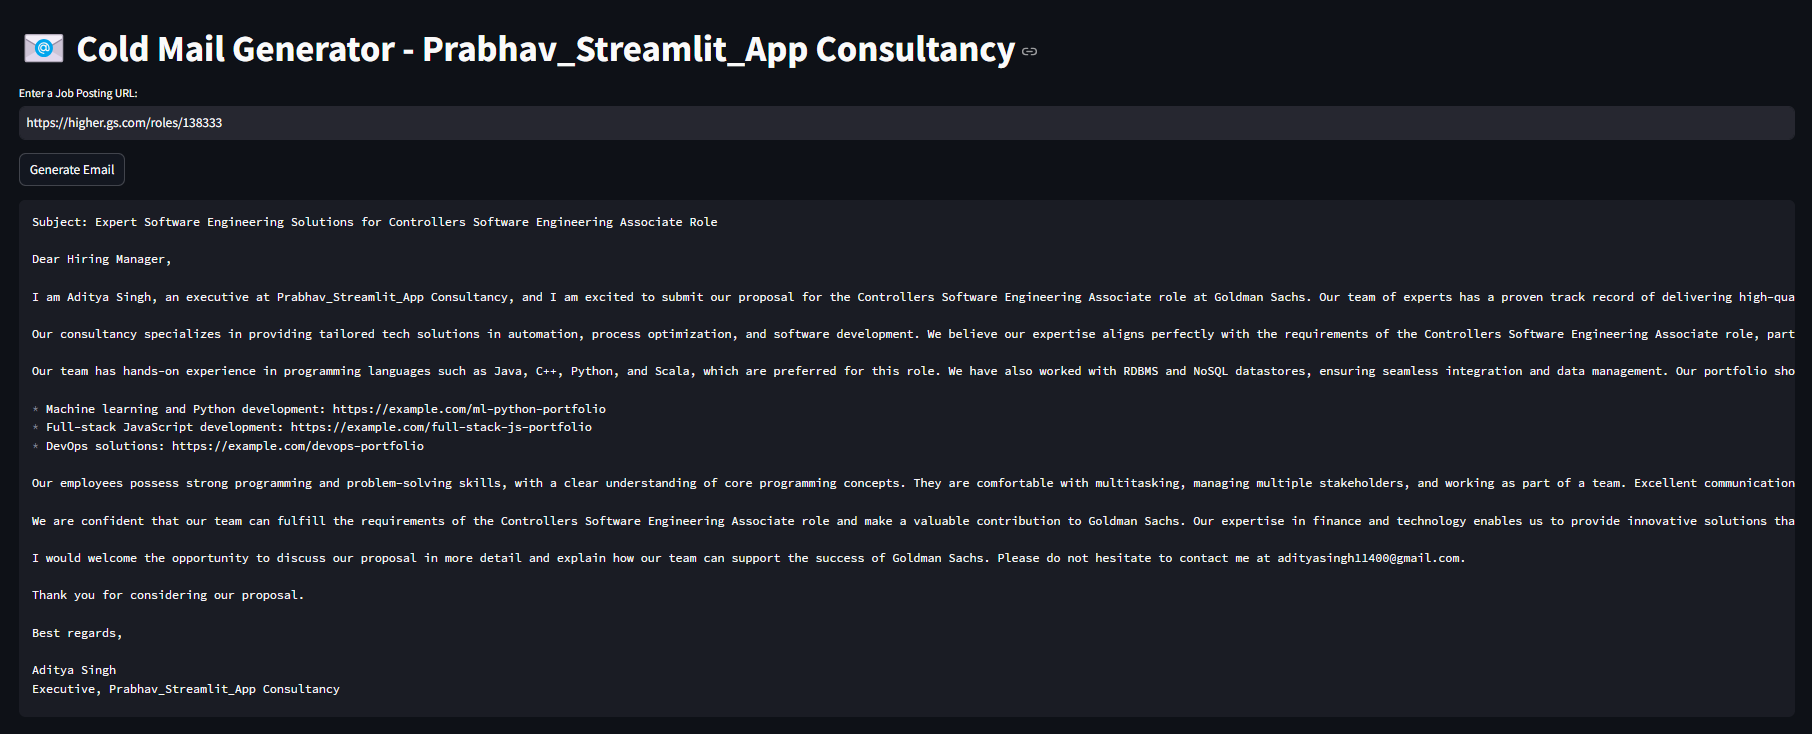


In [ ]:
import os
import re
import uuid
import streamlit as st
from dotenv import load_dotenv  # Import dotenv to load environment variables
from langchain_community.document_loaders import WebBaseLoader
from langchain_groq import ChatGroq
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.exceptions import OutputParserException
import chromadb


# Load environment variables from the .env file
load_dotenv()

# Utility Functions
def clean_text(text):
    """Cleans raw text by removing HTML tags, URLs, special characters, and extra whitespace."""
    text = re.sub(r'<[^>]*?>', '', text)
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    text = re.sub(r'\s{2,}', ' ', text)
    text = text.strip()
    text = ' '.join(text.split())
    return text


# Portfolio Management
class Portfolio:
    def __init__(self):
        # Portfolio data is embedded here instead of reading from a file
        self.data = [
            {"Techstack": "React, Node.js, MongoDB", "Links": "https://example.com/react-portfolio"},
            {"Techstack": "Angular,.NET, SQL Server", "Links": "https://example.com/angular-portfolio"},
            {"Techstack": "Vue.js, Ruby on Rails, PostgreSQL", "Links": "https://example.com/vue-portfolio"},
            {"Techstack": "Python, Django, MySQL", "Links": "https://example.com/python-portfolio"},
            {"Techstack": "Java, Spring Boot, Oracle", "Links": "https://example.com/java-portfolio"},
            {"Techstack": "Flutter, Firebase, GraphQL", "Links": "https://example.com/flutter-portfolio"},
            {"Techstack": "WordPress, PHP, MySQL", "Links": "https://example.com/wordpress-portfolio"},
            {"Techstack": "Magento, PHP, MySQL", "Links": "https://example.com/magento-portfolio"},
            {"Techstack": "React Native, Node.js, MongoDB", "Links": "https://example.com/react-native-portfolio"},
            {"Techstack": "iOS, Swift, Core Data", "Links": "https://example.com/ios-portfolio"},
            {"Techstack": "Android, Java, Room Persistence", "Links": "https://example.com/android-portfolio"},
            {"Techstack": "Kotlin, Android, Firebase", "Links": "https://example.com/kotlin-android-portfolio"},
            {"Techstack": "Android TV, Kotlin, Android NDK", "Links": "https://example.com/android-tv-portfolio"},
            {"Techstack": "iOS, Swift, ARKit", "Links": "https://example.com/ios-ar-portfolio"},
            {"Techstack": "Cross-platform, Xamarin, Azure", "Links": "https://example.com/xamarin-portfolio"},
            {"Techstack": "Backend, Kotlin, Spring Boot", "Links": "https://example.com/kotlin-backend-portfolio"},
            {"Techstack": "Frontend, TypeScript, Angular", "Links": "https://example.com/typescript-frontend-portfolio"},
            {"Techstack": "Full-stack, JavaScript, Express.js", "Links": "https://example.com/full-stack-js-portfolio"},
            {"Techstack": "Machine Learning, Python, TensorFlow", "Links": "https://example.com/ml-python-portfolio"},
            {"Techstack": "DevOps, Jenkins, Docker", "Links": "https://example.com/devops-portfolio"},
        ]
        self.chroma_client = chromadb.PersistentClient('vectorstore')
        self.collection = self.chroma_client.get_or_create_collection(name="portfolio")

    def load_portfolio(self):
        """Loads the portfolio into the ChromaDB collection."""
        if not self.collection.count():
            for row in self.data:
                self.collection.add(
                    documents=row["Techstack"],
                    metadatas={"links": row["Links"]},
                    ids=[str(uuid.uuid4())]
                )

    def query_links(self, skills):
        """Queries the collection for relevant links based on the skills provided."""
        return self.collection.query(query_texts=skills, n_results=2).get('metadatas', [])


# Chain Logic
class Chain:
    def __init__(self):
        # Fetch the API key securely from environment variables
        groq_api_key = os.getenv('GROQ_API_KEY')
        print("GROQ_API_KEY:", groq_api_key)  # Debugging line to check if the key is loaded

        if not groq_api_key:
            raise ValueError("API key is missing. Ensure it is set in the .env file or as an environment variable.")

        self.llm = ChatGroq(
            temperature=0,
            groq_api_key=groq_api_key,  # Use the API key from the environment
            model_name="llama-3.1-70b-versatile"
        )


    def extract_jobs(self, cleaned_text):
        """Extracts job descriptions from scraped text."""
        prompt_extract = PromptTemplate.from_template(
            """
            ### SCRAPED TEXT FROM WEBSITE:
            {page_data}
            ### INSTRUCTION:
            The scraped text is from the career's page of a website.
            Your job is to extract the job postings and return them in JSON format containing the following keys: `role`, `experience`, `skills` and `description`.
            Only return the valid JSON.
            ### VALID JSON (NO PREAMBLE):
            """
        )
        chain_extract = prompt_extract | self.llm
        res = chain_extract.invoke(input={"page_data": cleaned_text})
        try:
            json_parser = JsonOutputParser()
            res = json_parser.parse(res.content)
        except OutputParserException:
            raise OutputParserException("Context too big. Unable to parse jobs.")
        return res if isinstance(res, list) else [res]

    def write_mail(self, job, links):
        """Generates a cold email based on job details and portfolio links."""
        prompt_email = PromptTemplate.from_template(
            """
            ### JOB DESCRIPTION:
            {job_description}

            ### INSTRUCTION:
            Your name is Aditya Singh, "Prabhav Singh ka bhai". Contact : adityasingh11400@gmail.com. You are an executive at **Prabhav_Streamlit_App Consultancy**, a cutting-edge consultancy providing tech solutions
            tailored to diverse business needs. Our team of experts has successfully executed numerous projects in the following areas:
            automation, process optimization, and tailored software solutions.

            Your job is to write a personalized email to the client regarding their job posting, showcasing **Prabhav_Streamlit_App Consultancy**'s
            capability to meet their needs by matching the following relevant portfolio examples: {link_list}.

            Please highlight why we are the best match for their job posting and how our employees can fulfill their requirements.
            Do not add a preamble.
            ### EMAIL (NO PREAMBLE):
            """
        )
        chain_email = prompt_email | self.llm
        res = chain_email.invoke({"job_description": str(job), "link_list": links})
        return res.content


# Streamlit App
def create_streamlit_app(llm, portfolio):
    """Creates the Streamlit interface for the Cold Mail Generator."""
    st.title("📧 Cold Mail Generator - Prabhav_Streamlit_App Consultancy")
    url_input = st.text_input("Enter a Job Posting URL:", value="Enter the link of Job Description to know the relevant portfolios from out company ... ")
    submit_button = st.button("Generate Email")

    if submit_button:
        try:
            loader = WebBaseLoader([url_input])
            data = clean_text(loader.load().pop().page_content)
            portfolio.load_portfolio()
            jobs = llm.extract_jobs(data)
            for job in jobs:  # for every job on the webpage, I am doing this
                skills = job.get('skills', [])
                links = portfolio.query_links(skills)
                email = llm.write_mail(job, links)
                st.code(email, language='markdown')
        except Exception as e:
            st.error(f"An Error Occurred: {e}")


# Main Function
if __name__ == "__main__":
    chain = Chain()
    portfolio = Portfolio()
    st.set_page_config(layout="wide", page_title="Cold Email Generator", page_icon="📧")
    create_streamlit_app(chain, portfolio)
